In [ ]:
#multiple image inference script

from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import os

MODEL_PATH = r"C:\Users\Nitesh\OneDrive\Desktop\Hackathons\DermAid\models\acne_best.pt"
TEST_DIR   = r"test_images"        # folder containing your images
CONF       = 0.1                   # confidence threshold
SAVE_DIR   = "detect/test_batch"   # output folder

# load model
model = YOLO(MODEL_PATH)

# get all image files in test_images/
img_paths = list(Path(TEST_DIR).glob("*.*"))
img_paths = [p for p in img_paths if p.suffix.lower() in [".jpg", ".jpeg", ".png"]]

print(f"Found {len(img_paths)} images")

# run prediction on the whole folder
results = model.predict(
    source=TEST_DIR,
    conf=CONF,
    save=True,
    project="runs/detect",
    name="test_batch",
    exist_ok=True,
    verbose=False
)

# print detections for each image
for res in results:
    img_name = Path(res.path).name
    boxes = res.boxes

    print(f"\nImage: {img_name}")

    if boxes is not None and len(boxes) > 0:
        for cls_id, conf in zip(boxes.cls.cpu().numpy().astype(int),
                                boxes.conf.cpu().numpy()):
            print(f" - Class {cls_id}, Confidence {float(conf):.3f}")
    else:
        print(" - No detections")

print("\nAnnotated images saved in:", SAVE_DIR)


Found 9 images
Results saved to runs\detect\test_batch

Image: test1.png
 - Class 3, Confidence 0.264
 - Class 3, Confidence 0.207
 - Class 3, Confidence 0.204
 - Class 3, Confidence 0.187
 - Class 3, Confidence 0.180
 - Class 3, Confidence 0.175
 - Class 3, Confidence 0.171
 - Class 3, Confidence 0.168
 - Class 3, Confidence 0.163
 - Class 3, Confidence 0.143
 - Class 3, Confidence 0.142
 - Class 3, Confidence 0.139
 - Class 3, Confidence 0.138
 - Class 3, Confidence 0.133
 - Class 3, Confidence 0.131
 - Class 3, Confidence 0.125
 - Class 2, Confidence 0.122
 - Class 3, Confidence 0.119
 - Class 3, Confidence 0.112
 - Class 3, Confidence 0.112
 - Class 3, Confidence 0.111
 - Class 3, Confidence 0.111
 - Class 3, Confidence 0.106
 - Class 3, Confidence 0.105
 - Class 3, Confidence 0.102
 - Class 3, Confidence 0.101

Image: test2.png
 - Class 2, Confidence 0.264
 - Class 2, Confidence 0.239
 - Class 2, Confidence 0.217
 - Class 2, Confidence 0.207
 - Class 2, Confidence 0.200
 - Class 2

Detections (class_id, confidence+0.5):
 - Class 3, Confidence 0.76
 - Class 3, Confidence 0.71
 - Class 3, Confidence 0.70
 - Class 3, Confidence 0.69
 - Class 3, Confidence 0.68
 - Class 3, Confidence 0.67
 - Class 3, Confidence 0.67
 - Class 3, Confidence 0.67
 - Class 3, Confidence 0.66
 - Class 3, Confidence 0.64
 - Class 3, Confidence 0.64
 - Class 3, Confidence 0.64
 - Class 3, Confidence 0.64
 - Class 3, Confidence 0.63
 - Class 3, Confidence 0.63
 - Class 3, Confidence 0.63
 - Class 2, Confidence 0.62
 - Class 3, Confidence 0.62
 - Class 3, Confidence 0.61
 - Class 3, Confidence 0.61
 - Class 3, Confidence 0.61
 - Class 3, Confidence 0.61
 - Class 3, Confidence 0.61
 - Class 3, Confidence 0.60
 - Class 3, Confidence 0.60
 - Class 3, Confidence 0.60

Saved annotated image at: annotated_test_image.png


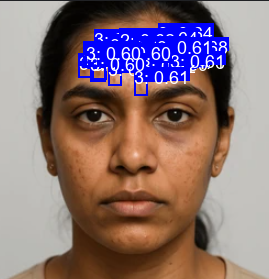

In [ ]:
# Single image inference with custom annotation (confidence + 0.5)JUGAAD

from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import numpy as np

MODEL_PATH = r"C:\Users\Nitesh\OneDrive\Desktop\Mumbai Hacks\runs\acne_yolov8\weights\acne_best.pt"
CONF = 0.1
IMG_PATH = "test_images/test1.png"

# Load model
model = YOLO(MODEL_PATH)

# Run inference without saving built-in annotations
res = model.predict(source=IMG_PATH, conf=CONF, save=False, verbose=False)[0]

# Load original image
img = Image.open(IMG_PATH).convert("RGB")
draw = ImageDraw.Draw(img)

# Font setup
try:
    font = ImageFont.truetype("arial.ttf", 18)
except:
    font = ImageFont.load_default()

# Utility: safe text size function
def get_text_size(text, font):
    """
    Works on all Pillow versions.
    """
    if hasattr(font, "getbbox"):
        # Pillow 10+
        bbox = font.getbbox(text)
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        return width, height
    elif hasattr(font, "getsize"):
        # Older versions
        return font.getsize(text)
    else:
        # Fallback
        return (len(text) * 8, 16)

def get_conf(conf):
    return float(conf) + 0.5
# Draw detections with +0.5 confidence


if res.boxes is not None and len(res.boxes) > 0:
    boxes = res.boxes.xyxy.cpu().numpy()
    cls_ids = res.boxes.cls.cpu().numpy().astype(int)
    confs = res.boxes.conf.cpu().numpy()

    print("Detections (class_id, confidence+0.5):")

    for box, cls_id, conf in zip(boxes, cls_ids, confs):
        x1, y1, x2, y2 = box

        # Add +0.5 to confidence
        conf = get_conf(conf)
        label_text = f"{cls_id}: {conf:.2f}"

        # Draw box
        draw.rectangle([x1, y1, x2, y2], outline="blue", width=2)

        # Compute text size using safe method
        text_w, text_h = get_text_size(label_text, font)

        # Draw background rectangle
        draw.rectangle([x1, y1 - text_h, x1 + text_w, y1], fill="blue")

        # Draw text on top
        draw.text((x1, y1 - text_h), label_text, fill="white", font=font)

        print(f" - Class {cls_id}, Confidence {conf:.2f}")

else:
    print("No detections found.")

# Save result
OUT_PATH = "annotated_test_image.png"
img.save(OUT_PATH)

print("\nSaved annotated image at:", OUT_PATH)
display(img)
